In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from my_package.cma import get_topk
import os


/tmp/ipykernel_284153/3195766934.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/ist-project/scads/can_sit/xx_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns
import pandas as pd 
top_neuron_path = '../../pickles/top_neurons/'
masking_mode = 'percent'
key = 0.05
data = {}
df = {}

/tmp/ipykernel_284153/1980722897.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)
/tmp/ipykernel_284153/1980722897.py:33: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)


[None, None]

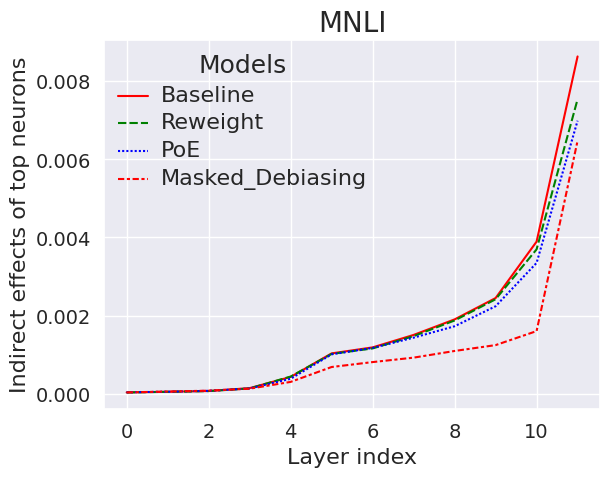

In [3]:
x_layer = []
y_nie = []
line_type = []
top_neurons = {}
current_dataset = 'MNLI'


method_names = ['nie_recent_baseline', 'nie_reweight_clark', 'nie_poe_clark', 'nie_masked_debiasing_baseline']
mappings_names = ['Baseline', 'Reweight', 'PoE', 'Masked Debiasing']
mappings_names = {k:v for (k,v) in zip(method_names, mappings_names)}
interventions = ['High-overlap','High-overlap', 'High-overlap', 'High-overlap']

for method_name, intervention in zip(method_names, interventions):
    dir_path = os.path.join(top_neuron_path, method_name)
    
    for seed in [1548, 3099, 3785, 3990, 409]:
        path = os.path.join(dir_path, f'top_neuron_layer_each_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
        with open(path, 'rb') as handle:  
            top_neurons[intervention] = pickle.load(handle)

        for layer in top_neurons[intervention][key].keys():
            x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[intervention][key][layer].items()])
            y_nie.extend([float(nie) for pos, nie in top_neurons[intervention][key][layer].items()])
            line_type.extend([mappings_names[method_name]] * len(top_neurons[intervention][key][layer])  )
    

data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

/tmp/ipykernel_12439/2164788564.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)


[None, None]

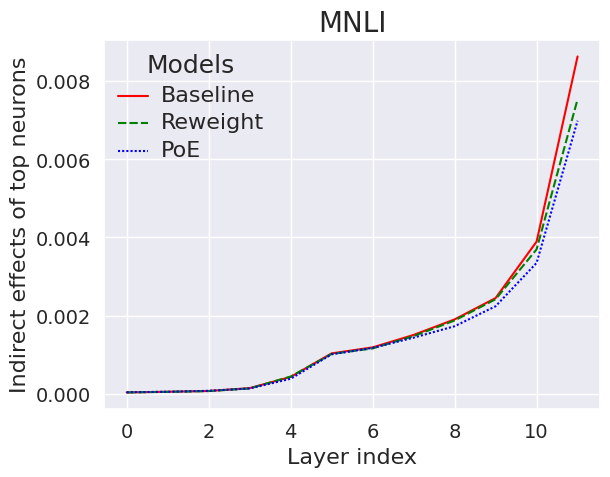

In [3]:
x_layer = []
y_nie = []
line_type = []
top_neurons = {}
current_dataset = 'MNLI'
method_names = ['nie_recent_baseline', 'nie_reweight_clark', 'nie_poe_clark']
mappings_names = ['Baseline', 'Reweight', 'PoE']
mappings_names = {k:v for (k,v) in zip(method_names, mappings_names)}
interventions = ['High-overlap','High-overlap', 'High-overlap']


for method_name, intervention in zip(method_names, interventions):
    dir_path = os.path.join(top_neuron_path, method_name)
    
    for seed in [1548, 3099, 3785, 3990, 409]:
        path = os.path.join(dir_path, f'top_neuron_layer_each_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
        with open(path, 'rb') as handle:  
            top_neurons[intervention] = pickle.load(handle)

        for layer in top_neurons[intervention][key].keys():
            x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[intervention][key][layer].items()])
            y_nie.extend([float(nie) for pos, nie in top_neurons[intervention][key][layer].items()])
            line_type.extend([mappings_names[method_name]] * len(top_neurons[intervention][key][layer])  )
    

data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

/tmp/ipykernel_12439/1105781929.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)


[None, None]

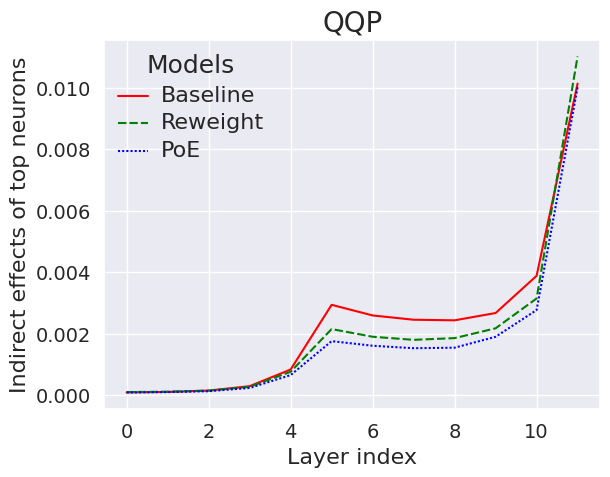

In [4]:
current_dataset = 'QQP'

x_layer = []
y_nie = []
line_type = []
top_neurons = {}
method_names = ['nie_baseline_qqp_mysplit', 'nie_reweight_qqp_mysplit', 'nie_poe_qqp_mysplit']
mappings_names = ['Baseline', 'Reweight', 'PoE']
mappings_names = {k:v for (k,v) in zip(method_names, mappings_names)}
interventions = ['High-overlap','High-overlap', 'High-overlap']

for method_name, intervention in zip(method_names, interventions):
    dir_path = os.path.join(top_neuron_path, method_name)
    
    for seed in [1548, 3099, 3785, 3990, 409]:
        path = os.path.join(dir_path, f'top_neuron_layer_each_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
        with open(path, 'rb') as handle:  
            top_neurons[intervention] = pickle.load(handle)

        for layer in top_neurons[intervention][key].keys():
            x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[intervention][key][layer].items()])
            y_nie.extend([float(nie) for pos, nie in top_neurons[intervention][key][layer].items()])
            line_type.extend([mappings_names[method_name]] * len(top_neurons[intervention][key][layer])  )
    

data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

/tmp/ipykernel_12439/2927241798.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)


[None, None]

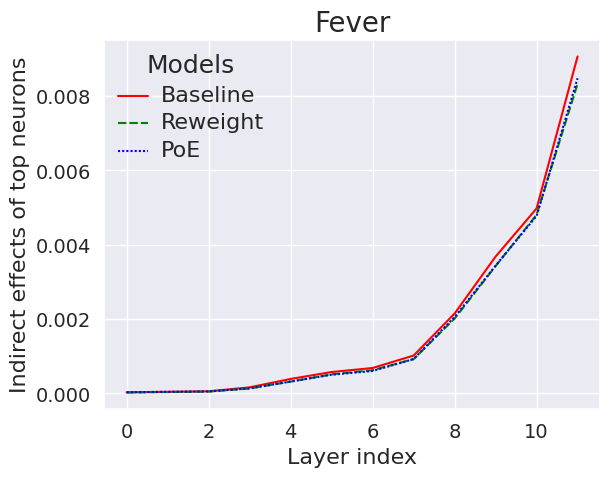

In [5]:
x_layer = []
y_nie = []
line_type = []
top_neurons = {}
current_dataset = 'Fever'
method_names = ['nie_fever_baseline', 'nie_fever_reweight', 'nie_fever_poe']
mappings_names = ['Baseline', 'Reweight', 'PoE']
mappings_names = {k:v for (k,v) in zip(method_names, mappings_names)}
interventions = ['High-overlap','High-overlap', 'High-overlap']


for method_name, intervention in zip(method_names, interventions):
    dir_path = os.path.join(top_neuron_path, method_name)
    
    for seed in [1548, 3099, 3785, 3990, 409]:
        path = os.path.join(dir_path, f'top_neuron_layer_each_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
        with open(path, 'rb') as handle:  
            top_neurons[intervention] = pickle.load(handle)

        for layer in top_neurons[intervention][key].keys():
            x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[intervention][key][layer].items()])
            y_nie.extend([float(nie) for pos, nie in top_neurons[intervention][key][layer].items()])
            line_type.extend([mappings_names[method_name]] * len(top_neurons[intervention][key][layer])  )
    

data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['red', 'green', 'blue'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

In [6]:
!ls ../../pickles/top_neurons/nie_fever_baseline/

sorted_top_neuron_1548_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_1548_percent_High-overlap_all_layers.pickle
sorted_top_neuron_3099_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_3099_percent_High-overlap_all_layers.pickle
sorted_top_neuron_3785_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_3785_percent_High-overlap_all_layers.pickle
sorted_top_neuron_3990_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_3990_percent_High-overlap_all_layers.pickle
sorted_top_neuron_409_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_409_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_1548_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_3099_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_3785_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_3990_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_409_percent_High-overlap_all_layers.pickle


In [10]:
!ls ../../pickles/top_neurons/nie_poe_clark/

random_top_neuron_3099_percent_High-overlap_all_layers.pickle
random_top_neuron_3785_percent_High-overlap_all_layers.pickle
random_top_neuron_3990_percent_High-overlap_all_layers.pickle
random_top_neuron_409_percent_High-overlap_all_layers.pickle
sorted_top_neuron_1548_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_3099_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_3785_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_3990_neurons_High-overlap_all_layers.pickle
sorted_top_neuron_409_neurons_High-overlap_all_layers.pickle
top_neuron_1548_percent_High-overlap_all_layers.pickle
top_neuron_3099_percent_High-overlap_all_layers.pickle
top_neuron_3785_percent_High-overlap_all_layers.pickle
top_neuron_3990_percent_High-overlap_all_layers.pickle
top_neuron_409_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_1548_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_3099_percent_High-overlap_all_layers.pickle
top_neuron_layer_each_3785_percent_Hig

In [ ]:
!ls ../../pickles/top_neurons/nie_reweight_clark/